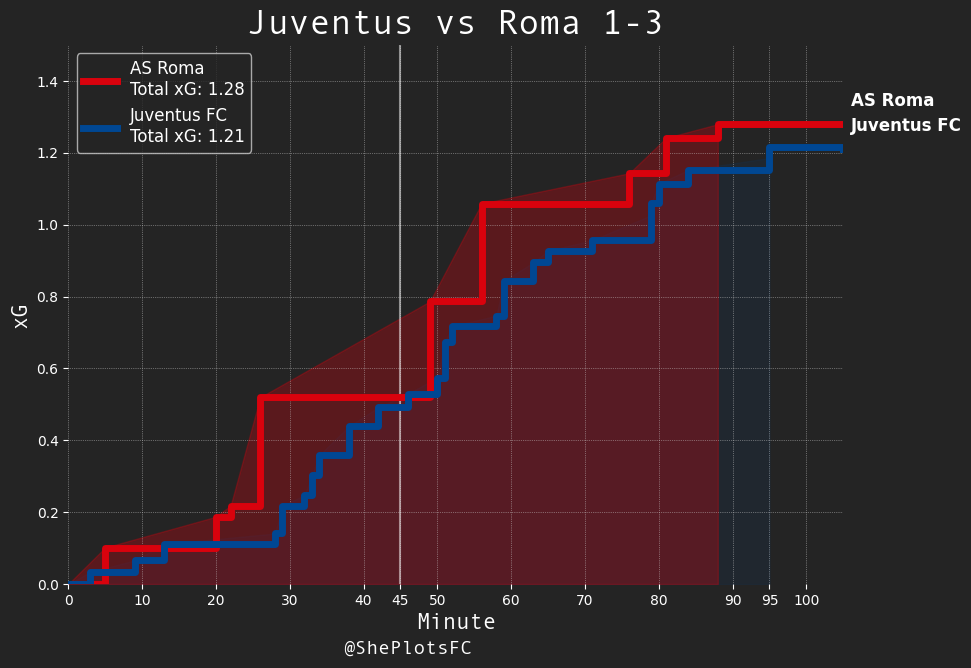

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv(r'/Users/marclambertes/Python/Serie A Women/xgCSV/2023-11-05_Juventus FC - AS Roma.csv') # encoding = 'unicode_escape')
#df = df.loc[(df['match_id']==3900587)]

#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


hteam = df['HomeTeam'].iloc[0]
ateam = df['AwayTeam'].iloc[-1]

for x in range(len(df['xG'])):
    if df['TeamId'][x]=='AS Roma':
        a_xG.append(df['xG'][x])
        a_min.append(df['timeMin'][x])
    if df['TeamId'][x]=='Juventus FC':
        h_xG.append(df['xG'][x])
        h_min.append(df['timeMin'][x])

        
#this finds our team names from the dataframe. This will only work as long as both teams took a shot

        
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor('#242424')
ax.patch.set_facecolor('#242424')

#set up our base layer
mpl.rcParams['xtick.color'] ='white'
mpl.rcParams['ytick.color'] ='white'

ax.grid(ls='dotted', lw=0.5, color='lightgrey', axis='y', zorder=1, which='both', alpha=0.8)
ax.grid(ls='dotted', lw=0.5, color='lightgrey', axis='x', zorder=1, which='both', alpha=0.8)

spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

plt.vlines( ymin=0, ymax=1.5,x=45, color='white', alpha=.5,linestyle="solid")

# create separate lists for each team's goal minutes


        
plt.xticks([0,10,20,30,40,45,50,60,70,80,90,95, 100])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)
#ax.fill_between(a_min, a_cumulative, color='#FF0D0D', alpha=0.1)
#ax.fill_between(h_min, h_cumulative, color='#0000CC', alpha=0.1)

# set the alpha value for the fills based on which team has the higher xG value
if hlast > alast:
    ax.fill_between(h_min, h_cumulative, color='#004793', alpha=0.3)
    ax.fill_between(a_min, a_cumulative, color='#D9020D', alpha=0.1)
else:
    ax.fill_between(h_min, h_cumulative, color='#004793', alpha=0.1)
    ax.fill_between(a_min, a_cumulative, color='#D9020D', alpha=0.3)



#plot the step graphs8593d3d3d3
a_min.append(105)
a_cumulative.append(alast)
h_min.append(105)
h_cumulative.append(hlast)
# set the x-axis limits from 0 to 90 minutes
ax.set_xlim(0, 105)
ax.set_ylim(0, 1.5)

# Plot the step graphs with 'post' option and add annotations at the end of each line
ax.step(x=a_min, y=a_cumulative, color='#D9020D', label=f'{ateam}\nTotal xG: {alast:.2f}', linewidth=5, where='post')
ax.step(x=h_min, y=h_cumulative, color='#004793', label=f'{hteam}\nTotal xG: {hlast:.2f}', linewidth=5, where='post')


# Set up the legend to display team labels and cumulative xG values
legend = ax.legend(loc='upper left', fontsize=12, facecolor='#242424')
for text in legend.get_texts():
    text.set_color("white")  # Set text color to white

# Add annotations at the end of each line
ax.annotate(ateam, xy=(a_min[-1], a_cumulative[-1]), xytext=(a_min[-1] + 1, a_cumulative[-1] + 0.05), color='white', fontsize=12, fontweight='bold')
ax.annotate(hteam, xy=(h_min[-1], h_cumulative[-1]), xytext=(h_min[-1] + 1, h_cumulative[-1] + 0.05), color='white', fontsize=12, fontweight='bold')
ax.set_title("Juventus vs Roma 1-3", fontsize=25, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)


fig.text(.40,0.01,f'@ShePlotsFC',fontstyle='italic',fontsize=14,fontfamily='Andale Mono', color='w')


plt.savefig('xgflow.png', dpi = 500, bbox_inches='tight',facecolor='#242424')